In [1]:
#mounting google drive to access final dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#unzipping the data folder to content directory
!unzip /content/drive/MyDrive/Research\ project/data.zip

Archive:  /content/drive/MyDrive/Research project/data.zip
   creating: content/data/
   creating: content/data/train/
   creating: content/data/train/Female/
  inflating: content/data/train/Female/Female_original_48__F_Right_thumb_finger.jpg_d1874c1a-875f-4305-be79-445f3ca10a71.jpg  
  inflating: content/data/train/Female/550__F_Right_ring_finger.jpg  
  inflating: content/data/train/Female/Female_original_508__F_Left_index_finger.jpg_4ba4ad67-bda0-4bec-8080-829eb4b3d7f9.jpg  
  inflating: content/data/train/Female/479__F_Left_middle_finger.jpg  
  inflating: content/data/train/Female/536__F_Right_little_finger.jpg  
  inflating: content/data/train/Female/31__F_Left_middle_finger.jpg  
  inflating: content/data/train/Female/25__F_Left_ring_finger.jpg  
  inflating: content/data/train/Female/156__F_Left_thumb_finger.jpg  
  inflating: content/data/train/Female/Female_original_204__F_Left_ring_finger.jpg_1331b5f7-635b-403a-98f2-3dbc2f1f6212.jpg  
  inflating: content/data/train/Female/4

In [ ]:
#Packages and versions installed
!pip install tensorflow==2.9.2
!pip install numpy==1.21.6
!pip install matplotlib
!pip install sscikit-learn==1.0.2
!pip install keras==2.9.0


In [3]:
# Import The Libraries 

import tensorflow as tf

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential

import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import os
from sklearn import metrics



In [14]:
# training and testing path variables assigned
train_Path = '/content/content/data/train'
val_Path = '/content/content/data/val'

In [5]:
# Set image resize variable
IMAGE_SIZE = [96, 96] # This is my desired image size... and also ResNet50 accepts image of 224*224.

In [6]:
#pre-training model without including the top layer trained in Imagenet dataset
pretrained_vgg16 = VGG16(
    input_shape = IMAGE_SIZE + [3], # Making the image into 3 Channel, so concating 3.
    weights = 'imagenet', # Default weights.
    include_top = False   
)

58889256/58889256 [==============================] - 0s 0us/step


In [7]:
pretrained_vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 96, 96, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 96, 96, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 48, 48, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 48, 48, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 48, 48, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 24, 24, 128)       0     

In [8]:
#freezing the weights of the model
for layer in pretrained_vgg16.layers:
  layer.trainable = False

In [9]:


# Flatten the output layer to 1 dimension
x = Flatten()(pretrained_vgg16.output)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = Dense(512, activation='relu')(x)
# Add a dropout rate of 0.2
x = Dropout(0.2)(x)  
# Add a fully connected layer with 512 hidden units and ReLU activation
x = Dense(512, activation='relu')(x)
# Add a dropout rate of 0.2
x = Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = Dense  (2, activation='sigmoid')(x)           

model = Model(pretrained_vgg16.input, x) 

model.compile (
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)


In [11]:
#defining class labels
gender_label = ['Male', 'Female']

In [12]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 96, 96, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 96, 96, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 48, 48, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 48, 48, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 48, 48, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 24, 24, 128)       0     

In [15]:
#training and test data generator
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

test_datagen = ImageDataGenerator(
    rescale = 1./255
)



training_set = train_datagen.flow_from_directory(
    train_Path,
    target_size = IMAGE_SIZE,
    batch_size = 512,
    class_mode = 'categorical' 
)

val_set = test_datagen.flow_from_directory(
    val_Path,
    target_size = IMAGE_SIZE,
    batch_size = 512,
    class_mode = 'categorical'
)

Found 3200 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [16]:
# Fit the model.

history = model.fit_generator(
    training_set,
    validation_data = val_set,
    epochs = 50,
    steps_per_epoch = len(training_set),
    validation_steps = len(val_set)
)

<ipython-input-16-51fe2b22f10d>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/50
7/7 [==============================] - 28s 3s/step - loss: 1.5700 - accuracy: 0.4969 - val_loss: 0.9621 - val_accuracy: 0.5000
Epoch 2/50
7/7 [==============================] - 10s 1s/step - loss: 0.7522 - accuracy: 0.5409 - val_loss: 0.6636 - val_accuracy: 0.5850
Epoch 3/50
7/7 [==============================] - 10s 1s/step - loss: 0.6521 - accuracy: 0.6112 - val_loss: 0.5868 - val_accuracy: 0.6637
Epoch 4/50
7/7 [==============================] - 9s 1s/step - loss: 0.6113 - accuracy: 0.6534 - val_loss: 0.5759 - val_accuracy: 0.6725
Epoch 5/50
7/7 [==============================] - 9s 1s/step - loss: 0.5957 - accuracy: 0.6750 - val_loss: 0.5631 - val_accuracy: 0.6700
Epoch 6/50
7/7 [==============================] - 12s 2s/step - loss: 0.5820 - accuracy: 0.6800 - val_loss: 0.5938 - val_accuracy: 0.6513
Epoch 7/50
7/7 [==============================] - 10s 2s/step - loss: 0.5814 - accuracy: 0.6850 - val_loss: 0.6297 - val_accuracy: 0.6375
Epoch 8/50
7/7 [====================

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


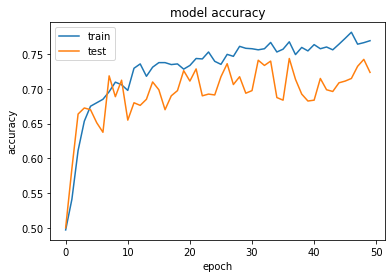

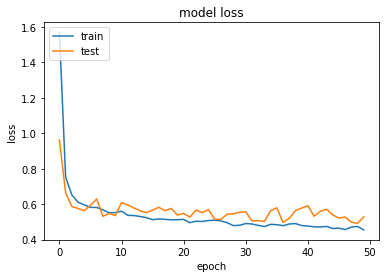

In [17]:
#plotting accuracy and loss graphs
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [18]:
#printing train accuracy and loss
result = model.evaluate(training_set,batch_size=256)
print("test_loss, test accuracy",result)

7/7 [==============================] - 8s 1s/step - loss: 0.4548 - accuracy: 0.7791
test_loss, test accuracy [0.45477351546287537, 0.7790625095367432]


In [19]:
#printing test accuracy and loss
result = model.evaluate(val_set,batch_size=256)
print("test_loss, test accuracy",result)

2/2 [==============================] - 1s 265ms/step - loss: 0.5287 - accuracy: 0.7237
test_loss, test accuracy [0.5286616683006287, 0.7237499952316284]
